In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
fund = ['AAPL', 'XEL', 'PWR', 'ABB']
mydata = pd.DataFrame()
for f in fund:
    mydata[f] = wb.DataReader(f, data_source='yahoo', start='2014-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 976 entries, 2014-01-02 to 2017-11-14
Data columns (total 4 columns):
AAPL    976 non-null float64
XEL     976 non-null float64
PWR     976 non-null float64
ABB     976 non-null float64
dtypes: float64(4)
memory usage: 38.1 KB


In [4]:
mydata.head()

,AAPL,XEL,PWR,ABB
Date,,,,
2014-01-02,73.259171,24.110088,31.290001,22.476974
2014-01-03,71.649979,24.101322,31.350000,22.659008
2014-01-06,72.040665,23.969860,30.959999,22.312279
2014-01-07,71.525482,24.381775,31.209999,22.424965
2014-01-08,71.978439,24.285368,31.320000,22.398958


In [5]:
mydata.tail()

,AAPL,XEL,PWR,ABB
Date,,,,
2017-11-08,175.608719,50.250000,36.340000,26.219999
2017-11-09,175.250000,50.509998,35.509998,25.740000
2017-11-10,174.669998,50.200001,35.840000,25.360001
2017-11-13,173.970001,50.790001,36.720001,25.480000
2017-11-14,172.809006,51.509998,36.020000,25.355000


### Normalization to 100:   

In [6]:
mydata.iloc[0]

AAPL    73.259171
XEL     24.110088
PWR     31.290001
ABB     22.476974
Name: 2014-01-02 00:00:00, dtype: float64

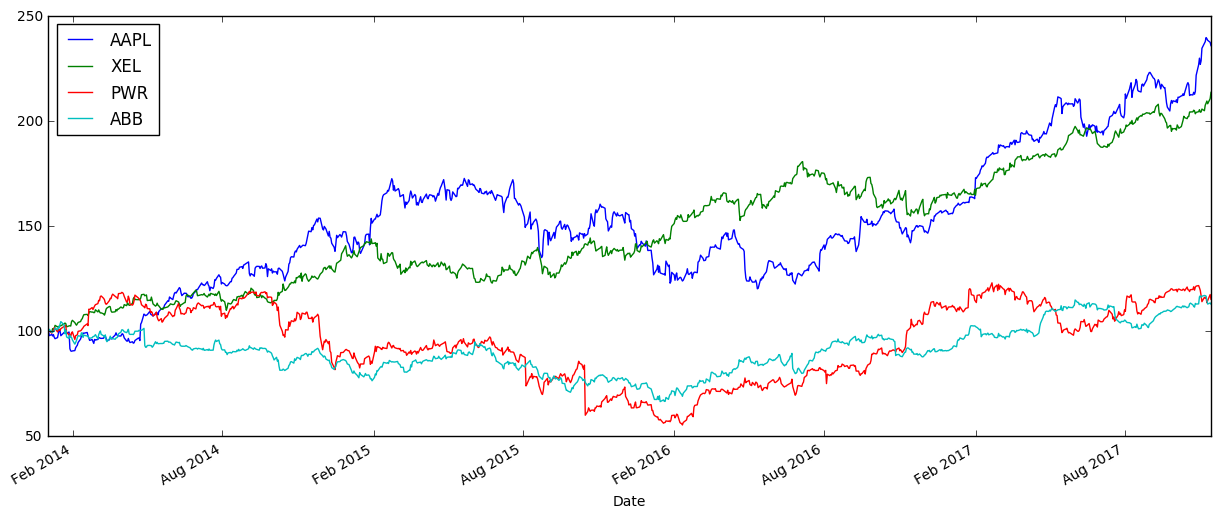

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

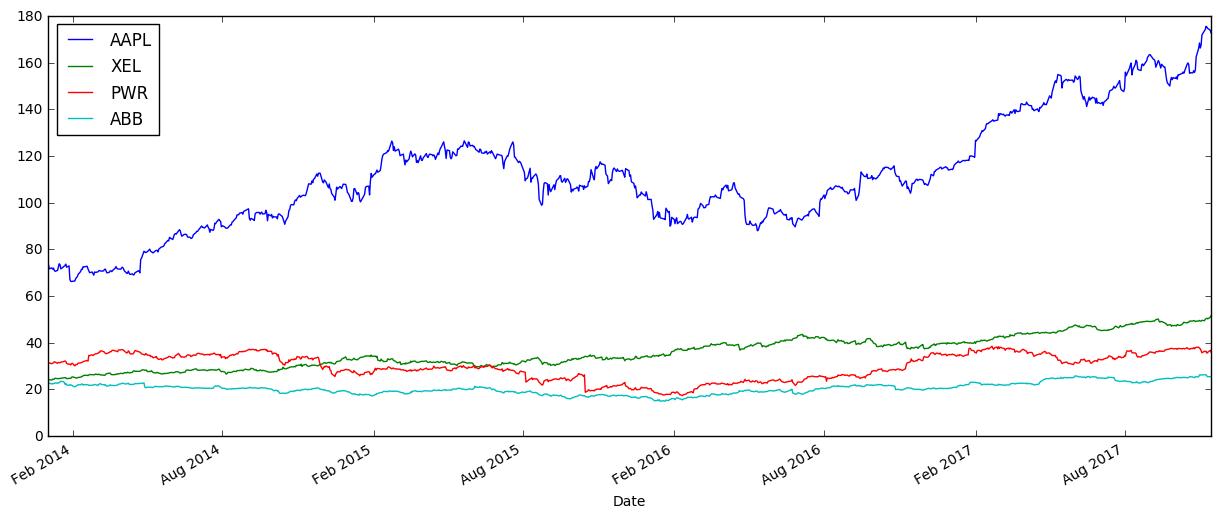

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
mydata.loc['2014-01-02']

AAPL    73.259171
XEL     24.110088
PWR     31.290001
ABB     22.476974
Name: 2014-01-02 00:00:00, dtype: float64

In [10]:
mydata.iloc[0]

AAPL    73.259171
XEL     24.110088
PWR     31.290001
ABB     22.476974
Name: 2014-01-02 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [11]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,AAPL,XEL,PWR,ABB
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,-0.021966,-0.000364,0.001918,0.008099
2014-01-06,0.005453,-0.005455,-0.012440,-0.015302
2014-01-07,-0.007151,0.017185,0.008075,0.005050
2014-01-08,0.006333,-0.003954,0.003525,-0.001160


In [12]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [14]:
annual_returns = returns.mean() * 250
annual_returns

AAPL    0.245750
XEL     0.207322
PWR     0.086318
ABB     0.048515
dtype: float64

In [16]:
dot = np.dot(annual_returns, weights)
dot

0.14697637317467116

In [17]:
pfolio_1 = str(round(dot, 5) * 100) + ' %'
print(pfolio_1)

14.698 %


In [18]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [19]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print(pfolio_1)
print(pfolio_2)

14.698 %
19.66 %
